In [ ]:
!pip install transformers
!pip install diffusers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importaciones**

In [ ]:
from diffusers import DiffusionPipeline
from PIL import Image
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

**Inicialización del modelo de generación de arte.**

In [ ]:
arte = DiffusionPipeline.from_pretrained("radames/stable-diffusion-2-1-unclip-small-img2img")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

(…)_noising_scheduler/scheduler_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

image_normalizer/config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.48G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

**Ruta archivo imagen.**

In [ ]:
ruta_carpeta = '/content/.config/img'

In [ ]:
archivos_en_carpeta = os.listdir(ruta_carpeta)

In [ ]:
archivos_de_imagen = [archivo for archivo in archivos_en_carpeta if archivo.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [ ]:
for imagen in archivos_de_imagen:
    ruta_imagen = os.path.join(ruta_carpeta, imagen)
    print('Ruta de la imagen:', ruta_imagen)
    imagen = Image.open(ruta_imagen)

Ruta de la imagen: /content/.config/img/1mg1mpr (6).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (3).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (10).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (21).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (14).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (9).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (12).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (17).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (22).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (15).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (5).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (13).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (2).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (11).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (1).jpeg
Ruta de la imagen: /content/.config/img/1mg1mpr (16).jpg
Ruta de la imagen: /content/.config/img/1mg1mpr (4).jpg
Ruta de la imagen: /content/.config/i

**Procesamiento imagen con el modelo seleccionado.**

In [10]:
imagen_procesada = arte(imagen)


  0%|          | 0/21 [00:00<?, ?it/s]

**Impresión imagen**

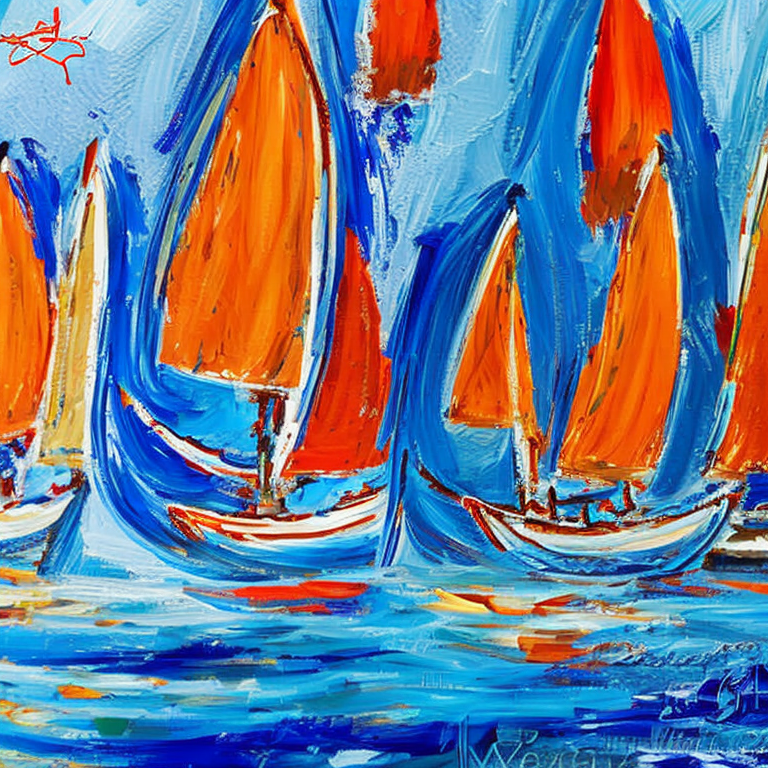

In [11]:
imagen = imagen_procesada.images[0]
display(imagen)